# FINAL PROJECT

In this python notebook, I will run through all the steps for this project, except for generating the custom dataset. This is because the videos have been generated using the notebook generate_own_dataset.ipynb and there is no point in re-recording the videos. I will just be showing the pre-processing, training & evaluating, and using the model on a live video feed.

## Pre-processing

I already created a pre-processing class, so I will just need to import that and run the method to pre-process the videos.

In [1]:
from pre_process_asl import Preprocess_ASL

2024-12-16 15:25:22.462271: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-16 15:25:22.463382: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-16 15:25:22.467402: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-16 15:25:22.474931: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734380722.486943   31767 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734380722.48

In [2]:
process_videos = Preprocess_ASL()

I0000 00:00:1734380724.619562   31767 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1734380724.622885   31853 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: GFX1103_R1 (gfx1103_r1, LLVM 15.0.7, DRM 3.57, 6.8.0-49-generic)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1734380724.693555   31836 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734380724.729430   31831 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734380724.731825   31837 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734380724.733300   31832 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734380724.733715   31844 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734380724.743324   31

In [3]:
process_videos.pre_process_words(start_word=0, end_word=11)

 Saved 82500 frames for 11 words


W0000 00:00:1734381073.443484   31838 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


Saved 82500 landmark arrays for 11 words


For 11 words, there are a total of 1,100 videos, for a total of 82500 frames. So, the function above just split 1,100 videos into frames, and then extracted landmark points for the 82,500 frames. This means the pre-processing step is over.

## Training

Next, I will train a model on this data. I also created a class for this, so I will be loading that now.

In [1]:
from training import Training_ASL

2024-12-16 16:19:03.975401: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-16 16:19:03.976732: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-16 16:19:03.980086: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-16 16:19:03.989294: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734383944.003388   54812 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734383944.00

Load all the landmark arrays

In [2]:
train_asl = Training_ASL(num_words=11)

Shape of data: (1100, 70, 1662)
Shape of labels: (1100,)


1,100 videos, 70 frames each video, and 1662 landmark points for each frame

Now, I will randomly split this data: 70% training, 15% validation, 15% testing

In [3]:
train_asl.random_split_prepare_data()

I will verify this worked by printing the shape of each dataset

In [4]:
print(train_asl.x_train.shape)
print(train_asl.x_val.shape)
print(train_asl.x_test.shape)

(770, 70, 1662)
(165, 70, 1662)
(165, 70, 1662)


770 is 70% of 1,100.

165 is 15% of 1,100.

165 is 15% of 1,100.

The random split worked

Now, I will build the model to train this data

In [5]:
train_asl.build_model()

W0000 00:00:1734383948.820413   54812 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/hadiml/anaconda3/envs/ece5831-2024/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
train_asl.model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 70, 32)         │       216,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 70, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 70, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 364,043 (1.39 MB)

 Trainable params: 364,043 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

Finally, I will train the model on the data

In [7]:
train_asl.train()

Epoch 1/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.1169 - loss: 2.3525 - val_accuracy: 0.1455 - val_loss: 1.9765
Epoch 2/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.1130 - loss: 2.2611 - val_accuracy: 0.0727 - val_loss: 2.4755
Epoch 3/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.1167 - loss: 2.3599 - val_accuracy: 0.2000 - val_loss: 2.0068
Epoch 4/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.2041 - loss: 2.0162 - val_accuracy: 0.1030 - val_loss: 1.8534
Epoch 5/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.1866 - loss: 1.8236 - val_accuracy: 0.1455 - val_loss: 1.7800
Epoch 6/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.1899 - loss: 1.7827 - val_accuracy: 0.1212 - val_loss: 1.8230
Epoch 7/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.1859 - loss: 1.8873 - val_accuracy: 0.2182 - val_loss: 1.7638
Epoch 8/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.2223 - loss: 1.7437 - val_accuracy: 0.

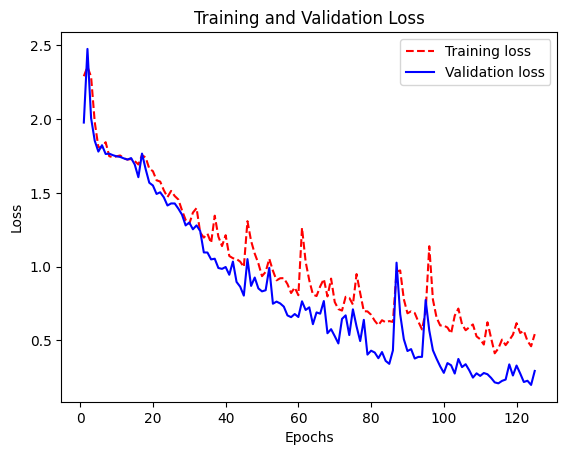

In [8]:
train_asl.plot_loss()

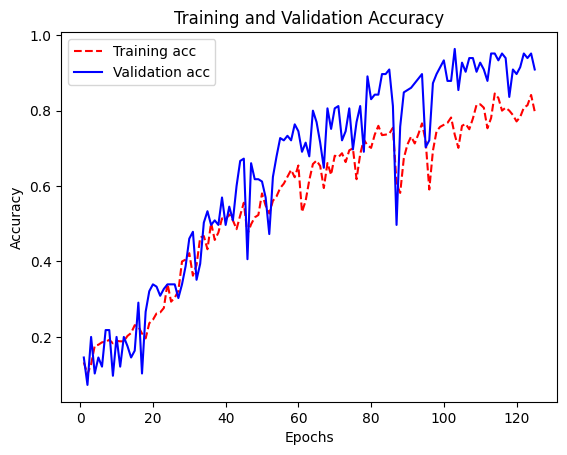

In [9]:
train_asl.plot_accuracy()

In [10]:
train_asl.evaluate_test()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9108 - loss: 0.3371
Loss: 0.3437217175960541
Accuracy: 0.9151515364646912


In [12]:
import numpy as np

In [13]:
train_asl.predict(train_asl.x_test[0], np.argmax(train_asl.y_test[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
Successfully predicted 9, which matches the label 9


I will save this model so it can be loaded later.

In [14]:
train_asl.save_model('final-project-notebook-model.keras')

## Using The Trained Model

Finally, I will start webcam and start predicting what the person in the picture is signing.

I will do this using the live_asl.py script. This script uses a different model than the one above. It is the one I trained using the training_asl.ipynb notebook, and the one mentioned in the report and presentation.

In [15]:
!python live_asl.py

2024-12-16 16:44:46.631871: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734385486.648031   61008 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734385486.652605   61008 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1734385489.290349   61008 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
I0000 00:00:1734385489.569935   61008 gl_context_egl.cc:85] Successful